# Super Market Retail Sales Analysis

This project is the stage 0 assignment for the HNGI2 Internsip. Successful completion of this will result in promotion into the stage 1.

The goal of the analysis is to discover insights such as top-selling products, user trends, or traffic sources from the data.

In [41]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# load dataframe

df = pd.read_csv("SampleSuperStore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [45]:
# check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [47]:
# describe the data

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

Using pandas .info() and .describe(), I learnt the data is clean. It requires very minimal cleaning like converting numerical columns (which are currently formatted as objects) to integers and floats as the case may be.

In [56]:
#check conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [52]:
# change to numeric

df["Postal Code"] = df["Postal Code"].astype("int64")
df["Sales"] = df["Sales"].astype("float64")
df["Quantity"] = df["Quantity"].astype("int64")
df["Discount"] = df["Discount"].astype("float64")
df["Profit"] = df["Profit"].astype("float64")

# Data Analysis

We will now go directly to start analyzing the data to discover as much insights as we can as possible.

In [154]:
countries = df["State"].value_counts()
countries

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [152]:
sales_by_countries = df.groupby("State")["Sales"].value_counts()
sales_by_countries

State      Sales   
Alabama    3.620       1
           3.760       1
           4.980       1
           7.160       1
           7.270       1
                      ..
Wisconsin  1565.880    1
           1649.750    1
           1951.840    1
           2807.840    1
Wyoming    1603.136    1
Name: count, Length: 8916, dtype: int64

In [65]:
# product category

product_category = df["Category"].value_counts()
product_category

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [79]:
sub_product_category = df["Sub-Category"].value_counts()
sub_product_category

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [135]:
product_by_sub_category = df.groupby("Category")["Sub-Category"].value_counts()
product_by_sub_category 

Category         Sub-Category
Furniture        Furnishings      957
                 Chairs           617
                 Tables           319
                 Bookcases        228
Office Supplies  Binders         1523
                 Paper           1370
                 Storage          846
                 Art              796
                 Appliances       466
                 Labels           364
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
Technology       Phones           889
                 Accessories      775
                 Machines         115
                 Copiers           68
Name: count, dtype: int64

ValueError: Names should be list-like for a MultiIndex

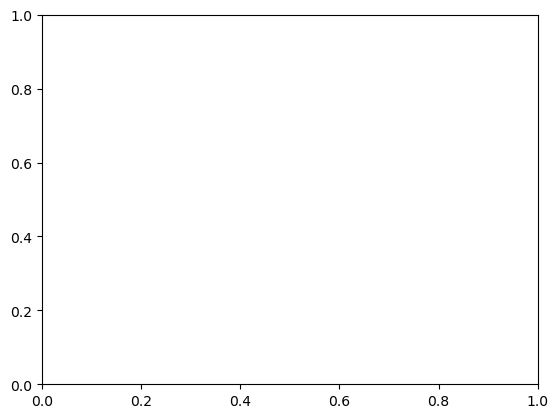

In [119]:
sns.barplot(data=prod_sub_product_category)
plt.show()